<a href="https://colab.research.google.com/github/yashveersinghsohi/TSF_GRIP_DSBA/blob/master/Task1/TSF_GRIP_DSBA_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Prediction using Supervised ML

**By: Yashveer Singh Sohi** <br>
Data Science and Business Analytics Intern at The Sparks Foundation

## Problem Description

- Predict the percentage of an student based on the no. of study hours.
- This is a simple linear regression task as it involves just 2 variables.
- Data can be found at http://bit.ly/w-data
- What will be predicted score if a student studies for 9.25 hrs/ day?

## Importing required packages

In this notebook:
- [pandas](https://pandas.pydata.org/docs/) and [numpy](https://numpy.org/doc/) are used for data manipulation.
- [matplotlib.pyplot](https://matplotlib.org/3.3.3/contents.html) and [seaborn](https://seaborn.pydata.org/) are used for plotting and data visualization.
- [sklearn](https://scikit-learn.org/stable/) is used for building a Linear Regression model for the data, and for evaluating the model.

In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Building and Evaluating Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Reading Data

- Using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method, the data is loaded into a pandas **dataframe** from the URL mentioned above.

In [2]:
# Data is stored in this URL
data_url = "http://bit.ly/w-data"

# Loading Data into a pandas dataframe
data = pd.read_csv(data_url)

# Show dataset
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Checking for Null values

- [isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) function is used to detect missing values for an array-like object.
- If a value is missing, it is set to **True** in the array returned by **isnull** function.
- Since, **True** is equivalant to 1, and **False** is equivalant to 0, the **sum** function will return the number of missing values for each column in the dataframe.

In [3]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Observations:** Clearly the data does not contain any missing values.

## Data Visualization

### Scatter Plot

- The scatter plot is built using [scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html) function in matplotlib.pyplot.
- The size of the figure is set using [figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) function.
- The [title](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html) , [xlabel](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html) , and [ylabel](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylabel.html) functions are used to set the **Title**, **X-axis label**, and **Y-axis label** respectively.
- To display the figure [show](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) function is used.

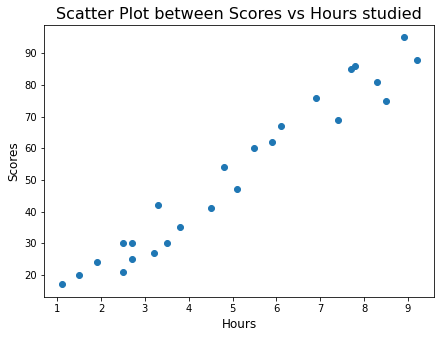

In [4]:
# Setting Figure Size
plt.figure(figsize = (7, 5))

# Plotting the scatter plot
plt.scatter(data["Hours"], data["Scores"])

# Setting Title, and axis labels
plt.title("Scatter Plot between Scores vs Hours studied", size = 16)
plt.xlabel("Hours", size = 12)
plt.ylabel("Scores", size = 12)

# Displaying the plot
plt.show()

**Observations:** There seems to be a strong positive correlation between the Number of hours a student studies, and the score that they receive.

### Heatmap

- The strong correlation observed in the previous plot can be quantified numerically using a **Heatmap**.
- The [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function in seaborn is used to build the heatmap.
- On setting `annot = True` the figure will have the correlation values between each column displayed.
- The [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) function is used to calculate the correlation between the columns of the dataframe **data**

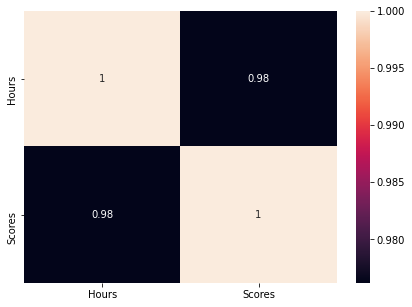

In [5]:
# Setting Figure Size
plt.figure(figsize = (7, 5))

# Plotting heatmap
sns.heatmap(data.corr(), annot = True)

# Displaying Figure
plt.show()

**Observations:** The strong positive correlation observed in the scatter plot is now verified using the heatmap

## Data Preperation

### Seperating Independent and Dependant variables

- The Independent variable is represented by **X**. Here `X = Number of Hours a student studies for`.
- The Dependant variable is represented by **y**. Here `y = Score received by the student`.
- The [values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html) function converts the columns to numpy arrays. 
- The [shape](https://numpy.org/devdocs/reference/generated/numpy.shape.html) function gives the dimensions of a numpy array.

In [6]:
# Seperating Independent and Dependant variables
X, y = data[["Hours"]].values, data["Scores"].values

# Printing size of the 2 arrays
print("Size of Independent variable X (Hours): ", X.shape)
print("Size of Dependant variable y (Scores): ", y.shape)

Size of Independent variable X (Hours):  (25, 1)
Size of Dependant variable y (Scores):  (25,)


### Splitting Data into train and test sets

- The data is split into 2 sets - train and test.
- Train set is used to train the model, and the test set is used to evaluate the model.
- Here, the **80%** of the data is used for training and the rest for testing.
- This split is done using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function in sklearn.
- Setting `test_size = 0.2` gives us the **80%** train and **20%** test split.
- Setting `random_state = 42` makes sure that the results obtained in this notebook can be reproduced. Without this, the function will return a random **80-20** split everytime it is run.

In [7]:
# Splitting Data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# Printing Train and Test sizes
print("Train Features Size (X_train) ", X_train.shape)
print("Train Targets Size (y_train) ", y_train.shape)
print()
print("Test Features Size (X_test) ", X_test.shape)
print("Test Targets Size (y_test) ", y_test.shape)

Train Features Size (X_train)  (20, 1)
Train Targets Size (y_train)  (20,)

Test Features Size (X_test)  (5, 1)
Test Targets Size (y_test)  (5,)


## Linear Regression

### Model Training

- The Model is first instantiated using the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) function.
- The [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method is used to then train this model.
- The fit method takes in the training features (`X_train`) and targets (`y_train`) as its parameters.


In [8]:
# Model Instantiation
linear_regression = LinearRegression()

# Model Training
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Predictions

- The [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) method is used to get the predictions of the Linear Regression model trained above.
- The function takes in the Testing features (`X_test`) as its argument.

In [9]:
# Model predictions
linear_regression_predictions = linear_regression.predict(X_test)

# Displaying Predictions
linear_regression_predictions

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In addition to the predictions over the test set, lets also store the predictions over the **full dataset**.

In [10]:
# Model predictions
linear_regression_predictions_complete = linear_regression.predict(X)

# Displaying Predictions
linear_regression_predictions_complete

array([27.03208774, 52.20549094, 33.80954245, 85.12455667, 36.71416589,
       17.35000959, 91.90201137, 56.0783222 , 83.18814104, 28.96850337,
       77.37889414, 59.95115347, 46.39624405, 34.77775026, 13.47717832,
       88.99738793, 27.03208774, 21.22284085, 61.8875691 , 74.4742707 ,
       28.96850337, 49.3008675 , 39.61878934, 69.63323162, 78.34710196])

### Model Evaluation

#### Visual Inspection

Lets compare the predicted values with the actual values.
- Using the [ravel](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html) function, a 2D array can be converted to a 1D array.
- The test features (`X_test`), test targets (`y_test`) and predictions on test features (`linear_regression_predictions`), are stored in a dataframe and disaplyed using the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) function. 

In [11]:
pd.DataFrame({
    "X_test": X_test.ravel(),
    "y_test": y_test.ravel(),
    "Predictions": linear_regression_predictions.ravel()
})

,X_test,y_test,Predictions
0,8.3,81,83.188141
1,2.5,30,27.032088
2,2.5,21,27.032088
3,6.9,76,69.633232
4,5.9,62,59.951153


The values of `y_test` and `linear_regression_predictions` look close enough. Lets visualize them more by using a scatter plot.
- Below 2 scatter plots are made. First one is for predictions over the complete dataset and the second one is for predictions over the test set only.
- The [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function in matplotlib is used to set the number of subplots, and the size of the figure.
- The [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) function is used to plot the predictions and connect the points in a line.
- The `marker`, `alpha`, `color`, `label` arguments in the plotting functions are used to style the plots. (refer docs of [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) and [scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html))
- The [set_title](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html), [set_xlabel](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html) and [set_ylabel](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html) functions are used to set the Title, and axis labels for each subplot.
- The legends are displayed in the plots using the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function. 

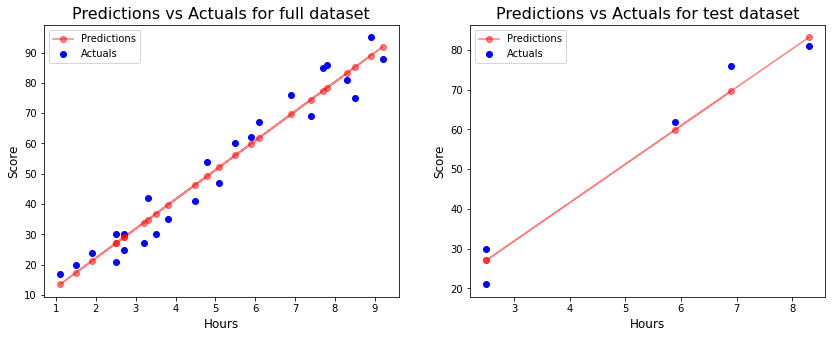

In [12]:
# Setting the subplots and figure size
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

# Building the first scatter plot
# Plotting dataset in blue
ax[0].scatter(X, y, color = "blue", label = "Actuals")
# Plotting predictions in red
ax[0].plot(X, linear_regression_predictions_complete, 
           alpha = 0.5, marker = "o", color = "red", label = "Predictions")
# Setting title, and axis labels
ax[0].set_title("Predictions vs Actuals for full dataset", size = 16)
ax[0].set_xlabel("Hours", size = 12)
ax[0].set_ylabel("Score", size = 12)
# Displaying Legends
ax[0].legend()


# Building the second scatter plot
# Plotting test dataset in blue
ax[1].scatter(X_test, y_test, color = "blue", label = "Actuals")
# Plotting predictions in red
ax[1].plot(X_test, linear_regression_predictions, 
           alpha = 0.5, marker = "o", color = "red", label = "Predictions")
# Setting title, and axis labels
ax[1].set_title("Predictions vs Actuals for test dataset", size = 16)
ax[1].set_xlabel("Hours", size = 12)
ax[1].set_ylabel("Score", size = 12)
# Displaying Legends
ax[1].legend()

# Displaying plots and legends
plt.show()

The model looks to be fitting the data well. But to get a quantitative measure of the model's performance, error metrics are used. 

#### Error Metrics

In this notebook, the model is evaluated using the following metrics:
- Mean Absolute Error
- Root Mean Squared Erroe

**Mean Absolute Error (MAE)**


- MAE is calculated using the [mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) function.
- The function takes in the actuals and the predictions in the following 2 arguments respectively: `y_true`, `y_pred`.

In [13]:
# Calculating MAE
mae = mean_absolute_error(y_true = y_test, 
                          y_pred = linear_regression_predictions)

# Displaying MAE
mae

3.9207511902099244

**Root Mean Squared Error (RMSE)**

- There is no direct function to calculate RMSE.
- To calculate RMSE, first MSE is calculated using the [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function.
- Like the previous function, it also takes in the actuals and the predictions in the following 2 arguments respectively: `y_true`, `y_pred`.
- The RMSE is calculated by using the [sqrt](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) function from numpy over the MSE calculated.

In [14]:
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_true = y_test, 
                                  y_pred = linear_regression_predictions))

# Displaying RMSE
rmse

4.352380006653288

## Answering the Question of the task

**Question:** What will be predicted score if a student studies for 9.25 hrs/ day?

In [15]:
# Setting the input to be 9.25 hours/day
ip = np.array([[9.25]])

# Calculating the predicted score using the Linear Regression Model
op = linear_regression.predict(ip)

# Displaying the absolute predicted score and the rounded off score
print("Absolute Predicted score ", op[0])
print("Rounded off score ", round(op[0])) 

Absolute Predicted score  92.38611528261494
Rounded off score  92
